In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
image_info = pd.read_excel('./image_info.xls')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
image_info.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,15133,837.64,0,4,0,1,0.0000,209.410000,0.00,0,0.0,0.0,0.0,0.000000,0.0000,0,2020-01-01,3
1,15213,11343.97,1,187,30,1,0.0053,60.662941,11343.97,0,0.0,0.0,0.0,0.002645,0.1344,628,2020-01-01,3
2,16276,1026.89,0,29,0,2,0.0000,35.410000,0.00,0,0.0,0.0,0.0,0.000000,0.3774,636,2020-01-01,3
3,16316,799.72,0,20,0,1,0.0000,39.986000,0.00,0,0.0,0.0,0.0,0.000000,0.0495,898,2020-01-01,3
4,17089,5653.74,2,242,24,4,0.0083,23.362562,2826.87,2,0.5,12.0,1.0,0.004245,0.0350,300,2020-01-01,3


In [5]:
image_info.shape

(23104, 18)

In [6]:
image_info['image_id'].nunique()

1140

In [7]:
image_info['image_30_roi'] = image_info['create_role_30_pay_sum'] / image_info['image_run_date_amount']

In [8]:
image_info.corr()['image_30_roi'].sort_values(ascending=False)

image_30_roi                   1.000000
image_create_role_roi          0.123193
create_role_30_pay_sum         0.060812
image_pay_sum_ability          0.057185
image_valid_source_rate        0.048744
image_create_role_pay_rate     0.044932
image_create_role_retain_1d    0.033377
image_pay_num_ability          0.028894
image_create_role_pay_sum      0.020892
image_valid_source_num         0.016453
image_create_role_pay_num      0.012211
image_create_role_num          0.008563
image_run_date_amount          0.006721
image_source_num               0.001838
image_create_role_pay_cost    -0.003826
image_create_role_cost        -0.024891
image_id                      -0.028477
data_win                            NaN
Name: image_30_roi, dtype: float64

In [9]:
image_info['label'] = image_info['image_30_roi'].apply(lambda x:1 if x>=0.4 else(0 if x<0.25 else 2))

In [10]:
image_info_label = image_info[image_info['label']!=2]

### EDA

In [11]:
image_info_label.shape

(21365, 20)

In [12]:
image_info_label = image_info_label[image_info_label['image_run_date_amount']>=500]

In [13]:
image_info_label.shape

(18608, 20)

In [14]:
image_info_label.nunique().sort_values()

data_win                           1
label                              2
image_valid_source_num            90
image_source_num                 114
image_create_role_pay_num        185
image_valid_source_rate          238
model_run_datetime               275
image_create_role_pay_rate       425
image_pay_num_ability            492
image_id                        1083
image_create_role_pay_sum       1606
image_pay_sum_ability           1646
image_create_role_retain_1d     2014
image_create_role_num           2643
create_role_30_pay_sum          5075
image_create_role_roi           7504
image_create_role_pay_cost      8245
image_30_roi                   11956
image_run_date_amount          15803
image_create_role_cost         15877
dtype: int64

In [15]:
image_info_label.drop(['data_win','image_30_roi'], axis=1, inplace=True)

In [16]:
image_info_label['image_valid_source_num'].value_counts()

0      14527
1       1292
2        800
3        482
4        318
       ...  
116        1
52         1
43         1
131        1
111        1
Name: image_valid_source_num, Length: 90, dtype: int64

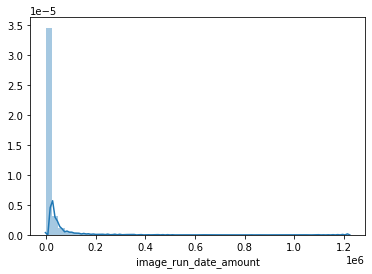

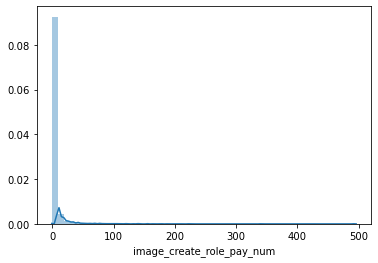

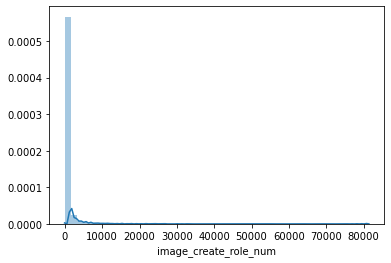

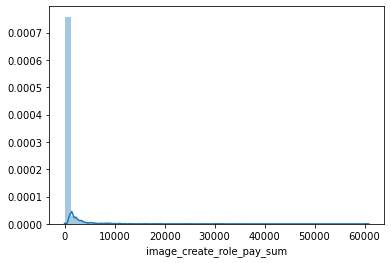

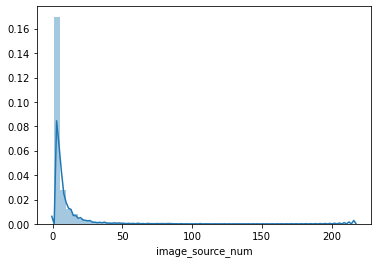

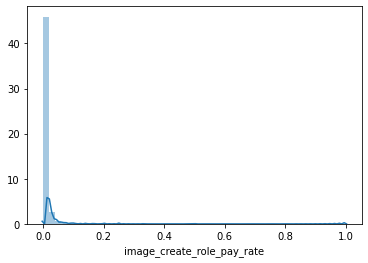

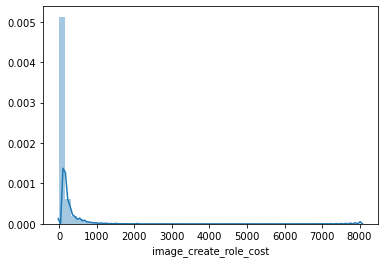

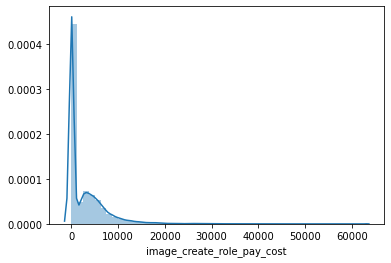

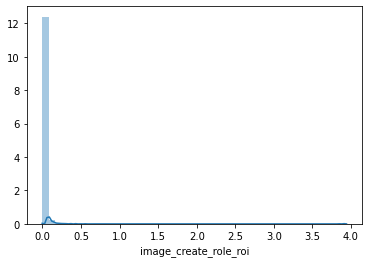

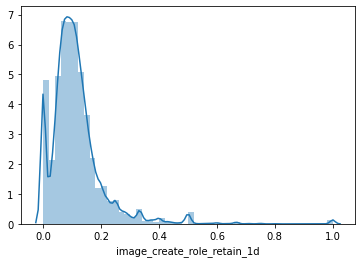

In [17]:
columns = ['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_create_role_roi', 'image_create_role_retain_1d']
for col in columns:
    sns.distplot(image_info_label[col])
    plt.show()

In [18]:
image_info_label[image_info_label['image_create_role_cost']>=800].shape

(276, 18)

In [19]:
image_info_label = image_info_label[image_info_label['image_create_role_cost']<800]

In [20]:
image_info_label['image_create_role_cost'].replace(0,float('inf'),inplace=True)

In [21]:
image_info_label['image_create_role_pay_cost'].replace(0,float('inf'),inplace=True)

In [22]:
image_info_label['image_create_role_pay_cost'].value_counts().sort_index()

261.250         1
410.846         1
413.535         1
418.595         1
425.370         1
             ... 
48914.530       1
50813.050       1
56187.360       1
62192.360       1
inf          9717
Name: image_create_role_pay_cost, Length: 8237, dtype: int64

In [23]:
image_info_label = image_info_label[image_info_label['image_create_role_pay_cost']>1000]

In [24]:
image_info_label.shape

(18169, 18)

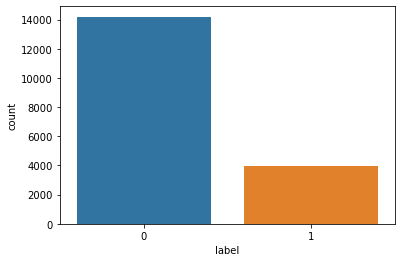

In [25]:
sns.countplot(x='label',data=image_info_label)
plt.show()

In [26]:
#多变量分析
image_info_label.corr()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,label
image_id,1.000000,-0.004963,-0.055517,-0.014412,-0.042665,0.066048,-0.010169,0.228569,0.254117,-0.086923,-0.215278,-0.117868,-0.162438,-0.048272,-0.053853,-0.047388,-0.134495
image_run_date_amount,-0.004963,1.000000,0.949453,0.883206,0.921916,0.835265,0.023937,-0.140362,-0.038589,0.742705,0.170214,0.224767,0.272332,0.076307,-0.069886,0.919680,0.287212
image_create_role_pay_num,-0.055517,0.949453,1.000000,0.862221,0.951074,0.702610,0.041748,-0.116605,-0.133894,0.814680,0.244843,0.270767,0.340566,0.084406,-0.041484,0.940310,0.277763
image_create_role_num,-0.014412,0.883206,0.862221,1.000000,0.832955,0.722657,-0.005232,-0.136959,-0.080513,0.681501,0.166307,0.199553,0.255011,0.067097,-0.087412,0.846204,0.261759
image_create_role_pay_sum,-0.042665,0.921916,0.951074,0.832955,1.000000,0.687921,0.043768,-0.108270,-0.117298,0.755783,0.218615,0.319664,0.310625,0.169638,-0.040010,0.928725,0.302579
image_source_num,0.066048,0.835265,0.702610,0.722657,0.687921,1.000000,0.032111,-0.144184,0.082171,0.591872,0.089120,0.113390,0.131005,0.072894,-0.080383,0.678717,0.281093
image_create_role_pay_rate,-0.010169,0.023937,0.041748,-0.005232,0.043768,0.032111,1.000000,0.106098,-0.248155,0.093353,0.458675,0.139013,0.170234,0.244011,0.187362,0.032614,0.128396
image_create_role_cost,0.228569,-0.140362,-0.116605,-0.136959,-0.108270,-0.144184,0.106098,1.000000,0.096787,-0.099955,-0.165241,-0.106499,-0.154826,-0.060339,0.237055,-0.113014,-0.198917
image_create_role_pay_cost,0.254117,-0.038589,-0.133894,-0.080513,-0.117298,0.082171,-0.248155,0.096787,1.000000,-0.185618,-0.544649,-0.216580,-0.314033,-0.135504,-0.151734,-0.107184,-0.216222
image_valid_source_num,-0.086923,0.742705,0.814680,0.681501,0.755783,0.591872,0.093353,-0.099955,-0.185618,1.000000,0.411297,0.223921,0.282585,0.096349,-0.019099,0.752704,0.266002


In [27]:
#特征选择,woe分箱
from scipy import stats
def monoto_bin(Y, X, n = 20):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    while np.abs(r) < 0.9:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates='raise')})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
#     print(r)
#     print(n)
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
    cut = []
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua =X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4,iv,cut,woe

In [28]:
dfx1,ivx1,cutx1,woex1 = monoto_bin(image_info_label['label'],image_info_label['image_run_date_amount'],n=10)
# dfx2,ivx2,cutx2,woex2 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_num'],n=10)
dfx3,ivx3,cutx3,woex3 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_num'],n=10)
# dfx4,ivx4,cutx4,woex4 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_sum'],n=10)
# dfx5,ivx5,cutx5,woex5 = monoto_bin(image_info_label['label'],image_info_label['image_source_num'],n=10)
# dfx6,ivx6,cutx6,woex6 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_rate'],n=10)
dfx7,ivx7,cutx7,woex7 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_cost'],n=10)
# dfx8,ivx8,cutx8,woex8 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_cost'],n=10)
# dfx9,ivx9,cutx9,woex9 = monoto_bin(image_info_label['label'],image_info_label['image_valid_source_rate'],n=10)
# dfx10,ivx10,cutx10,woex10 = monoto_bin(image_info_label['label'],image_info_label['image_pay_sum_ability'],n=10)
# dfx11,ivx11,cutx11,woex11 = monoto_bin(image_info_label['label'],image_info_label['image_pay_num_ability'],n=10)
# dfx12,ivx12,cutx12,woex12 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_roi'],n=10)
# dfx13,ivx13,cutx13,woex13 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_retain_1d'],n=10)

[1.332, 1.202, 0.953, 0.845, 0.503, 0.216, 0.031, -0.363, -0.871, -1.702]


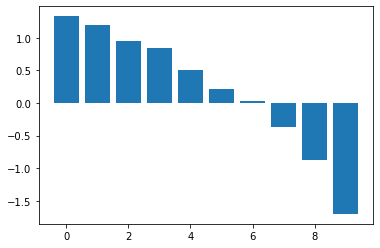

[1.902, 1.227, 0.873, 0.771, 0.503, 0.215, 0.022, -0.394, -0.862, -1.784]


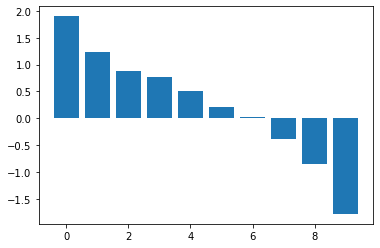

[-0.609, -0.703, -0.521, -0.481, -0.139, 0.059, 0.359, 0.689, 1.315, 1.777]


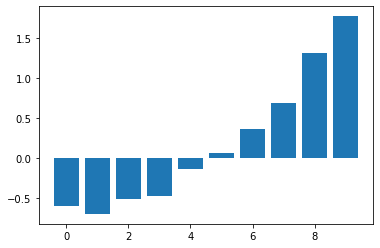

In [29]:
woex = [woex1,woex3,woex7]
for col in woex:
    print('{}'.format(col))
    plt.bar(range(len(col)),col)
    plt.show()

In [30]:
def self_bin(Y, X, bin):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.cut(X, bin)})
    d2 = d1.groupby('Bucket', as_index = True)
    r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    #好坏比，求woe,证据权重，自变量对目标变量有没有影响，什么影响
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    #iv，信息值，自变量对于目标变量的影响程度
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
#     print (d4)
    woe = list(d4['woe'].round(3))
    return d4,iv,woe

In [32]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
cutx2 = [ninf, 1, 3, 8, 12,50,pinf]
cutx4 = [ninf,60,200,700,2000,5000,10000,pinf]
cutx5 = [ninf,3,6,12,20,50,pinf]
cutx6 = [ninf,0.005,0.01,0.015,0.02,pinf]
cutx8 = [ninf, 2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,13000,pinf]
cutx9 = [ninf, 0.1, 0.2, 0.3, 0.4,0.6,pinf]
cutx10 = [ninf, 50,100,200, 400,1000, pinf]
cutx11 = [ninf, 1,2,5,10,20,pinf]
cutx12 = [ninf, 0.005,0.01,0.015,0.02,0.025,0.05,pinf]
cutx13 = [ninf, 0.06,0.1,0.14,0.2,0.3,pinf]

woex1 = [1.332, 1.202, 0.953, 0.845, 0.503, 0.216, 0.031, -0.363, -0.871, -1.702]
woex2 = [0.896, -0.47, -1.078, -1.616, -2.105, -4.266]
woex3 = [1.902, 1.227, 0.873, 0.771, 0.503, 0.215, 0.022, -0.394, -0.862, -1.784]
woex4 = [1.0, -0.098, -0.943, -1.772, -2.692, -3.759, -5.138]
woex5 = [0.552, -0.086, -0.573, -0.865, -1.345, -3.033]
woex6 = [0.691, -0.919, -0.999, -0.956, -0.646]
woex7 = [-0.609, -0.703, -0.521, -0.481, -0.139, 0.059, 0.359, 0.689, 1.315, 1.777]
woex8 = [-1.338, -1.316, -1.277, -0.962, -0.781, -0.609, -0.363, -0.261, -0.112, -0.076, 0.243, 1.219]
woex9 = [0.513, -0.717, -1.43, -1.04, -1.413, -1.256]
woex10 = [0.443, -0.981, -1.658, -2.221, -2.823, -3.33]
woex11 = [0.343, -1.502, -2.005, -2.372, -2.66, -2.883]
woex12 = [1.104, 0.044, -0.404, -0.896, -1.163, -1.872, -2.508]
woex13 = [0.712, -0.167, -0.338, -0.162, 0.212, 0.47]


In [37]:
for i in range(1,14):
    exec("print('cutx%s =',cutx%s)"%(i,i))

cutx1 = [-inf, 891.102, 1409.628, 2165.43, 3167.068, 4656.48, 6886.692, 10651.84, 18862.02, 40665.782, inf]
cutx2 = [-inf, 1, 3, 8, 12, 50, inf]
cutx3 = [-inf, 6.0, 14.0, 27.0, 51.0, 85.0, 142.0, 244.0, 480.0, 1271.0, inf]
cutx4 = [-inf, 60, 200, 700, 2000, 5000, 10000, inf]
cutx5 = [-inf, 3, 6, 12, 20, 50, inf]
cutx6 = [-inf, 0.005, 0.01, 0.015, 0.02, inf]
cutx7 = [-inf, 20.073, 28.7217, 36.4717, 45.8384, 57.2259, 74.043, 98.3442, 141.3023, 254.55, inf]
cutx8 = [-inf, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 13000, inf]
cutx9 = [-inf, 0.1, 0.2, 0.3, 0.4, 0.6, inf]
cutx10 = [-inf, 50, 100, 200, 400, 1000, inf]
cutx11 = [-inf, 1, 2, 5, 10, 20, inf]
cutx12 = [-inf, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05, inf]
cutx13 = [-inf, 0.06, 0.1, 0.14, 0.2, 0.3, inf]


In [43]:
image_info_label['image_create_role_retain_1d'].describe()

count    18169.000000
mean         0.112854
std          0.091386
min          0.000000
25%          0.062500
50%          0.098000
75%          0.140300
max          1.000000
Name: image_create_role_retain_1d, dtype: float64

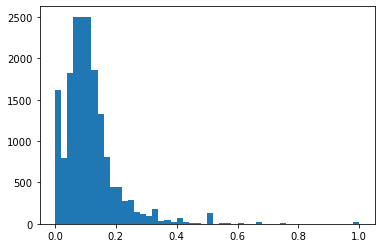

In [45]:
plt.hist(image_info_label['image_create_role_retain_1d'],bins=50,range=(0,1))
plt.show()

In [34]:
dfx2,ivx2,woex2 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_num'],cutx2)
dfx4,ivx4,woex4 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_sum'],cutx4)
dfx5,ivx5,woex5 = self_bin(image_info_label['label'],image_info_label['image_source_num'],cutx5)
dfx6,ivx6,woex6 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_rate'],cutx6)
dfx8,ivx8,woex8 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_cost'],cutx8)
dfx9,ivx9,woex9 = self_bin(image_info_label['label'],image_info_label['image_valid_source_rate'],cutx9)
dfx10,ivx10,woex10 = self_bin(image_info_label['label'],image_info_label['image_pay_sum_ability'],cutx10)
dfx11,ivx11,woex11 = self_bin(image_info_label['label'],image_info_label['image_pay_num_ability'],cutx11)
dfx12,ivx12,woex12 = self_bin(image_info_label['label'],image_info_label['image_create_role_roi'],cutx12)
dfx13,ivx13,woex13 = self_bin(image_info_label['label'],image_info_label['image_create_role_retain_1d'],cutx13)

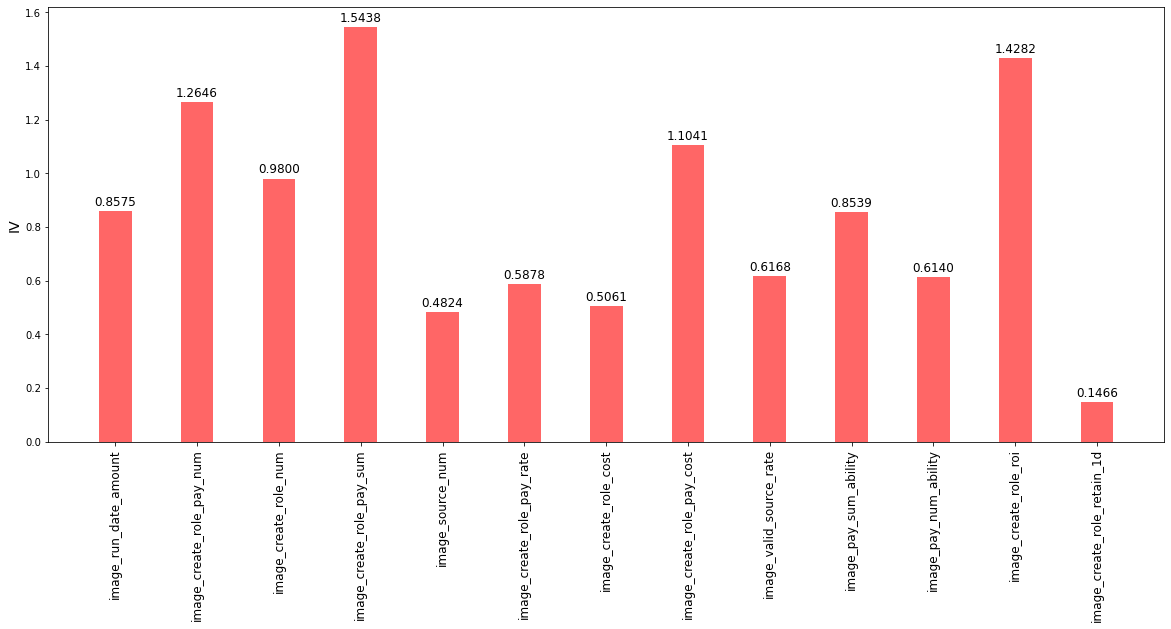

In [35]:
y=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10,ivx11,ivx12,ivx13]
index=['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost','image_valid_source_rate',
       'image_pay_sum_ability', 'image_pay_num_ability',
       'image_create_role_roi','image_create_role_retain_1d']
fig= plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(range(1,14), y, width=0.4,color = 'r',alpha = 0.6)#生成柱状图
ax1.set_xticks(range(1,14))
ax1.set_xticklabels(index, rotation=90, fontsize=12)
ax1.set_ylabel('IV', fontsize=14)
#在柱状图上添加数字标签
for i, v in enumerate(y):
    plt.text(i+1, v+0.01, '%.4f' % v, ha='center', va='bottom', fontsize=12)
plt.show()

In [38]:
"""
根据IV值判断变量预测能力的标准:
< 0.02： useless for predition
0.02-0.1： weak predictor
0.1-0.3： medium predictor
0.3-0.5： strong predictor
大于0.5： suspicious or too good to be true
"""
#删除掉iv小于0.1的变量
select_feature = ['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_valid_source_rate',
       'image_pay_sum_ability', 'image_pay_num_ability',
       'image_create_role_roi','image_create_role_retain_1d', 'label']

In [39]:
len(select_feature)

14

In [40]:
def change_woe(d,cut,woe):
    """
    将每个样本对应特征值更换为woe值
    """
    list1=[]
    i=0
    while i<len(d):
        value=d.values[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list1.append(woe[m])
        i += 1
    return list1

In [41]:
image_info_change = image_info_label.copy()

In [42]:
image_info_change.shape

(18169, 18)

In [43]:
#数据转化
image_info_change['image_run_date_amount'] = change_woe(image_info_change['image_run_date_amount'], cutx1, woex1)
image_info_change['image_create_role_pay_num'] = change_woe(image_info_change['image_create_role_pay_num'], cutx2, woex2)
image_info_change['image_create_role_num'] = change_woe(image_info_change['image_create_role_num'], cutx3, woex3)
image_info_change['image_create_role_pay_sum'] = change_woe(image_info_change['image_create_role_pay_sum'], cutx4, woex4)
image_info_change['image_source_num'] = change_woe(image_info_change['image_source_num'], cutx5, woex5)
image_info_change['image_create_role_pay_rate'] = change_woe(image_info_change['image_create_role_pay_rate'], cutx6, woex6)
image_info_change['image_create_role_cost'] = change_woe(image_info_change['image_create_role_cost'], cutx7, woex7)
image_info_change['image_create_role_pay_cost'] = change_woe(image_info_change['image_create_role_pay_cost'], cutx8, woex8)
image_info_change['image_valid_source_rate'] = change_woe(image_info_change['image_valid_source_rate'], cutx9, woex9)
image_info_change['image_pay_sum_ability'] = change_woe(image_info_change['image_pay_sum_ability'], cutx10, woex10)
image_info_change['image_pay_num_ability'] = change_woe(image_info_change['image_pay_num_ability'], cutx11, woex11)
image_info_change['image_create_role_roi'] = change_woe(image_info_change['image_create_role_roi'], cutx12, woex12)
image_info_change['image_create_role_retain_1d'] = change_woe(image_info_change['image_create_role_retain_1d'], cutx13, woex13)

In [44]:
image_info_change.shape

(18169, 18)

In [45]:
image_info_change.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label
0,15133,1.332,0.896,1.902,1.0,0.552,0.691,1.315,1.219,0,0.513,0.443,0.343,1.104,0.712,0,2020-01-01,0
1,15213,-0.363,-0.470,0.022,1.0,0.552,-0.919,0.059,0.243,0,0.513,0.443,0.343,1.104,-0.338,628,2020-01-01,0
2,16276,1.202,0.896,0.771,1.0,0.552,0.691,-0.521,1.219,0,0.513,0.443,0.343,1.104,0.470,636,2020-01-01,1
3,16316,1.332,0.896,0.873,1.0,0.552,0.691,-0.481,1.219,0,0.513,0.443,0.343,1.104,0.712,898,2020-01-01,1
4,17089,0.216,-0.470,0.022,1.0,-0.086,-0.919,-0.703,-1.316,2,-1.413,0.443,-1.502,1.104,0.712,300,2020-01-01,0


In [50]:
test_id = np.random.choice(image_info_change['image_id'].unique(),300)

In [51]:
test_date = image_info_change[image_info_change['image_id'].isin(test_id)]
train_date = image_info_change[~image_info_change['image_id'].isin(test_id)]

In [52]:
train_date.shape

(13414, 18)

In [53]:
test_date.shape

(4755, 18)

In [109]:
select_feature = ['image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_valid_source_rate',
       'image_pay_sum_ability', 'image_pay_num_ability',
       'image_create_role_roi','image_create_role_retain_1d', 'label']

In [110]:
x_train = train_date[select_feature].drop('label',axis=1)
y_train = train_date['label']
x_test = test_date[select_feature].drop('label',axis=1)
y_test = test_date['label']

In [111]:
#模型建立
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score,auc, classification_report

### RandomForestClassifier

In [112]:
RF = RandomForestClassifier()
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4, 6, 8]}
RF_random = RandomizedSearchCV(RF, param_distributions=param_grid, cv=5)
RF_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 7, 9],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'n_estimators': [9, 18, 27, 36, 100,
                                                         150]})

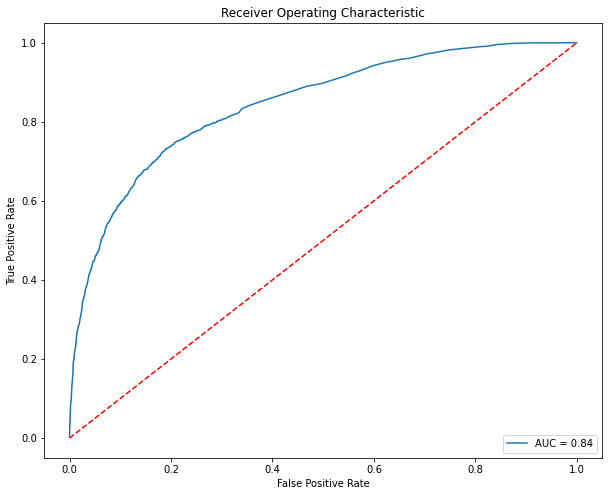

In [113]:
# 训练集评估
best_est_RF = RF_random.best_estimator_
y_pred = best_est_RF.predict_proba(x_train)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

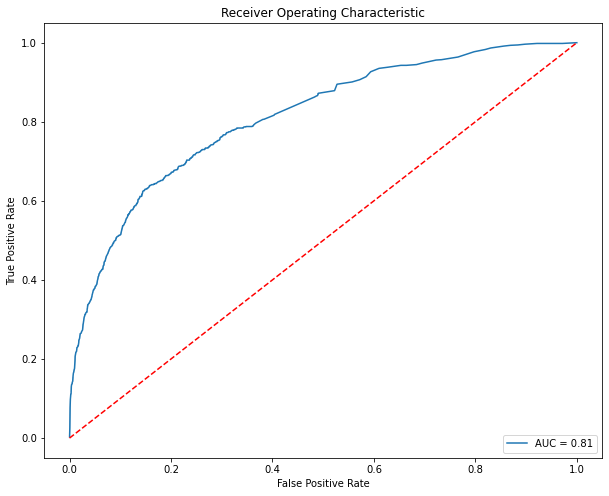

In [114]:
# 测试集评估
best_est_RF = RF_random.best_estimator_
y_pred = best_est_RF.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3708
           1       0.58      0.55      0.57      1047

    accuracy                           0.81      4755
   macro avg       0.73      0.72      0.72      4755
weighted avg       0.81      0.81      0.81      4755



In [709]:
import joblib
joblib.dump(best_est_RF, 'best_est_RF.pkl')

['best_est_RF.pkl']

### LogisticRegression

In [116]:
LR = LogisticRegression()
param_grid = {"C" : [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9, 1]}
LR_random = RandomizedSearchCV(LR, param_distributions=param_grid, cv=5)
LR_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9, 1]})

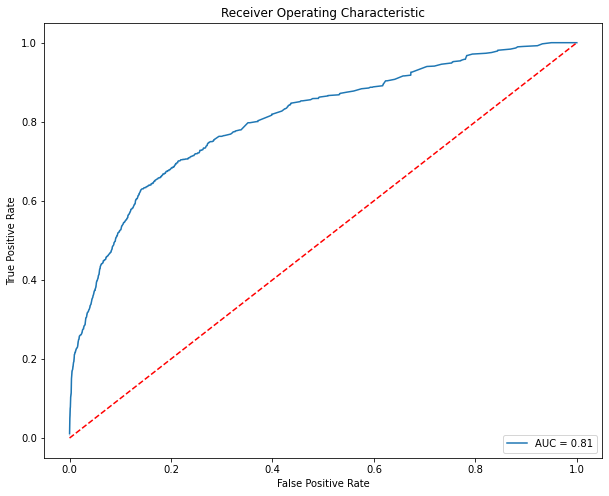

In [117]:
# 测试集评估
best_est_LR = LR_random.best_estimator_
y_pred = best_est_LR.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3708
           1       0.57      0.58      0.58      1047

    accuracy                           0.81      4755
   macro avg       0.73      0.73      0.73      4755
weighted avg       0.81      0.81      0.81      4755



### XGB

In [119]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_jobs=-1) 
 
param_grid = {
                  'n_estimators' :[100,150,200,250,300],
                  "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [0.5,0.7],
                  'max_depth': [3,4,6,8,10,12,15,20,25,30]
              }
XGB_random = RandomizedSearchCV(XGB, param_distributions=param_grid, cv=5)
XGB_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

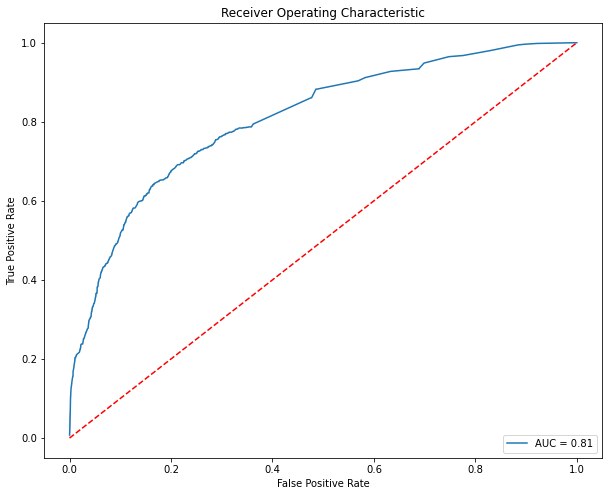

In [120]:
# 测试集评估
best_est_XGB = XGB_random.best_estimator_
y_pred = best_est_XGB.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3708
           1       0.53      0.62      0.57      1047

    accuracy                           0.80      4755
   macro avg       0.71      0.73      0.72      4755
weighted avg       0.81      0.80      0.80      4755



In [708]:
joblib.dump(best_est_XGB, 'best_est_XGB.pkl')

['best_est_XGB.pkl']

### lgb

In [122]:
from lightgbm import LGBMClassifier

In [123]:
LGB = LGBMClassifier(boosting_type='gbdt',objective = 'binary',metric = 'auc',n_jobs=-1) 
param_grid = {
              'max_depth': [15, 20, 25, 30, 35],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_freq': [2, 4, 5, 6, 8],
              'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
              'lambda_l2': [0, 10, 15, 35, 40],
              'cat_smooth': [1, 10, 15, 20, 35]
}
LGB_random = RandomizedSearchCV(LGB, param_distributions=param_grid, cv=5)
LGB_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(metric='auc', objective='binary'),
                   param_distributions={'bagging_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             0.95],
                                        'bagging_freq': [2, 4, 5, 6, 8],
                                        'cat_smooth': [1, 10, 15, 20, 35],
                                        'feature_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             0.95],
                                        'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
                                        'lambda_l2': [0, 10, 15, 35, 40],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [15, 20, 25, 30, 35]})

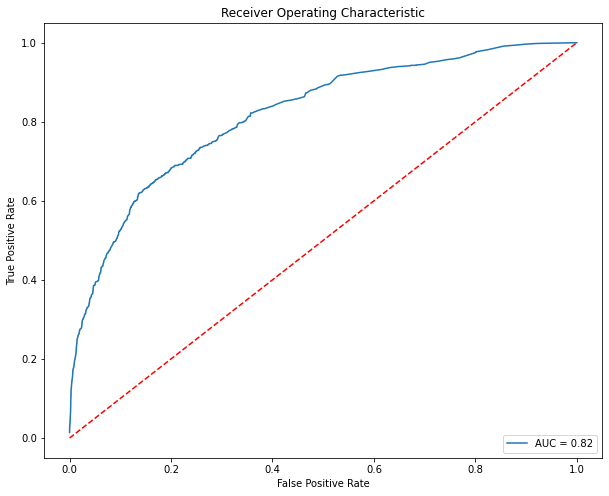

In [124]:
# 测试集评估
best_est_LGB = LGB_random.best_estimator_
y_pred = best_est_LGB.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [710]:
joblib.dump(best_est_LGB, 'best_est_LGB.pkl')

['best_est_LGB.pkl']

### 选XGB + LGB +RF融合

In [638]:
XGB_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [639]:
LGB_random.best_estimator_

LGBMClassifier(bagging_fraction=0.8, bagging_freq=4, cat_smooth=15,
               feature_fraction=0.95, lambda_l1=0.4, lambda_l2=15,
               learning_rate=0.15, max_depth=15, metric='auc',
               objective='binary')

In [640]:
RF_random.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=150)

In [125]:
y_pred = 0.4* best_est_XGB.predict_proba(x_test)[:,1] + 0.3*best_est_LGB.predict_proba(x_test)[:,1] + 0.3*best_est_RF.predict_proba(x_test)[:,1]

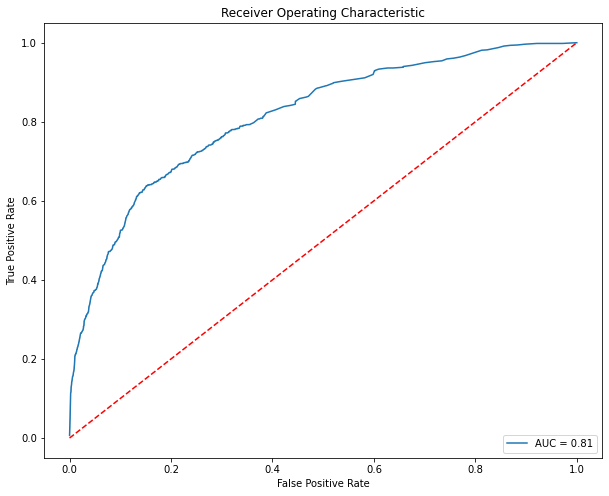

In [126]:
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [128]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3708
           1       0.58      0.56      0.57      1047

    accuracy                           0.81      4755
   macro avg       0.73      0.73      0.73      4755
weighted avg       0.81      0.81      0.81      4755



### 转化为分数

In [129]:
image_info_change.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label,pred,score
0,15133,1.332,0.896,1.902,1.0,0.552,0.691,1.315,1.219,0,0.513,0.443,0.343,1.104,0.712,0,2020-01-01,0,0.045787,469
1,15213,-0.363,-0.470,0.022,1.0,0.552,-0.919,0.059,0.243,0,0.513,0.443,0.343,1.104,-0.338,628,2020-01-01,0,0.152484,526
2,16276,1.202,0.896,0.771,1.0,0.552,0.691,-0.521,1.219,0,0.513,0.443,0.343,1.104,0.470,636,2020-01-01,1,0.140230,522
3,16316,1.332,0.896,0.873,1.0,0.552,0.691,-0.481,1.219,0,0.513,0.443,0.343,1.104,0.712,898,2020-01-01,1,0.076761,493
4,17089,0.216,-0.470,0.022,1.0,-0.086,-0.919,-0.703,-1.316,2,-1.413,0.443,-1.502,1.104,0.712,300,2020-01-01,0,0.226240,547


In [130]:
feature = image_info_change[select_feature].drop('label',axis=1)
image_info_change['pred'] = 0.4* best_est_XGB.predict_proba(feature)[:,1] + 0.3*best_est_LGB.predict_proba(feature)[:,1] + 0.3*best_est_RF.predict_proba(feature)[:,1]

In [131]:
image_info_change.shape

(18169, 20)

In [132]:
image_info_change.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label,pred,score
0,15133,1.332,0.896,1.902,1.0,0.552,0.691,1.315,1.219,0,0.513,0.443,0.343,1.104,0.712,0,2020-01-01,0,0.076181,469
1,15213,-0.363,-0.470,0.022,1.0,0.552,-0.919,0.059,0.243,0,0.513,0.443,0.343,1.104,-0.338,628,2020-01-01,0,0.183722,526
2,16276,1.202,0.896,0.771,1.0,0.552,0.691,-0.521,1.219,0,0.513,0.443,0.343,1.104,0.470,636,2020-01-01,1,0.168062,522
3,16316,1.332,0.896,0.873,1.0,0.552,0.691,-0.481,1.219,0,0.513,0.443,0.343,1.104,0.712,898,2020-01-01,1,0.114587,493
4,17089,0.216,-0.470,0.022,1.0,-0.086,-0.919,-0.703,-1.316,2,-1.413,0.443,-1.502,1.104,0.712,300,2020-01-01,0,0.259429,547


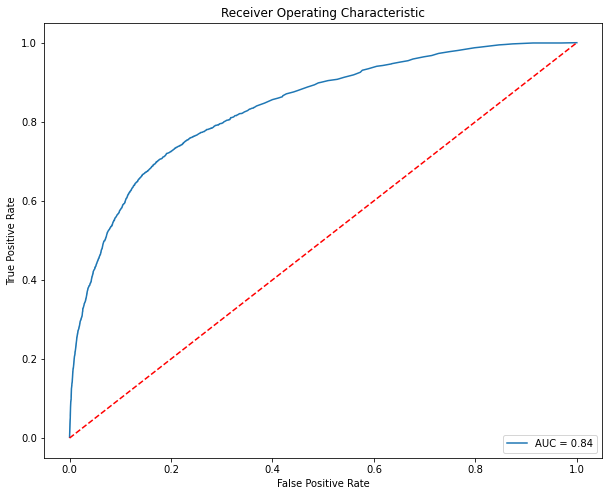

In [133]:
fpr,tpr,_ = roc_curve(image_info_change['label'], image_info_change['pred'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, image_info_change['pred']))
print(classification_report(image_info_change['label'], y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     14197
           1       0.61      0.59      0.60      3972

    accuracy                           0.83     18169
   macro avg       0.75      0.74      0.74     18169
weighted avg       0.83      0.83      0.83     18169



In [135]:
def Prob2Score(prob, basePoint=600, PDO=30):
    #将概率转化成分数且为正整数
    y = np.log(prob/(1-prob))
    return (basePoint+int(PDO/np.log(2)*(y)))

In [136]:
image_info_change['score'] = image_info_change['pred'].apply(Prob2Score)

In [137]:
image_info_label['score'] = image_info_change['score']

In [138]:
image_info_label.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label,score
0,15133,837.64,0,4,0,1,0.0000,209.410000,inf,0,0.0,0.0,0.0,0.000000,0.0000,0,2020-01-01,0,492
1,15213,11343.97,1,187,30,1,0.0053,60.662941,11343.97,0,0.0,0.0,0.0,0.002645,0.1344,628,2020-01-01,0,536
2,16276,1026.89,0,29,0,2,0.0000,35.410000,inf,0,0.0,0.0,0.0,0.000000,0.3774,636,2020-01-01,1,531
3,16316,799.72,0,20,0,1,0.0000,39.986000,inf,0,0.0,0.0,0.0,0.000000,0.0495,898,2020-01-01,1,512
4,17089,5653.74,2,242,24,4,0.0083,23.362562,2826.87,2,0.5,12.0,1.0,0.004245,0.0350,300,2020-01-01,0,555


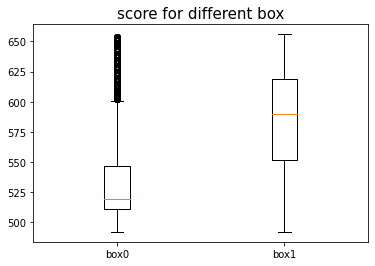

In [139]:
box0 = image_info_label[image_info_label['label']==0]['score']
box1 = image_info_label[image_info_label['label']==1]['score']
plt.title('score for different box',fontsize=15)
labels = 'box0','box1'
plt.boxplot([box0,box1],labels=labels)
plt.show()

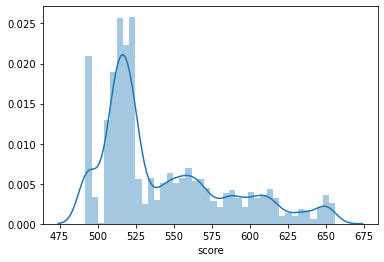

In [140]:
sns.distplot(image_info_label['score'])
plt.show()

In [141]:
image_info_label[image_info_label['score']>=600]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=600]['image_run_date_amount'].sum()

0.7506294134838967

In [142]:
image_info_label[image_info_label['score']<600]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<600]['image_run_date_amount'].sum()

0.33881059397353186

In [143]:
image_info_label['create_role_30_pay_sum'].sum()

192796227

In [144]:
image_info_label[image_info_label['score']<600]['create_role_30_pay_sum'].sum()

65754989

In [145]:
image_info_label['create_role_30_pay_sum'].sum() / image_info_label['image_run_date_amount'].sum()

0.5306480249748728

In [146]:
image_info_label[image_info_label['score']>=600]['image_run_date_amount'].sum() / image_info_label['image_run_date_amount'].sum()

0.46582968507711137

In [147]:
image_info_label[image_info_label['score']>=660]['image_run_date_amount'].sum() / image_info_label['image_run_date_amount'].sum()

0.0

In [148]:
print('高分区ROI：',image_info_label[image_info_label['score']>=660]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=660]['image_run_date_amount'].sum())
print('低分区ROI：',image_info_label[image_info_label['score']<660]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<660]['image_run_date_amount'].sum())

高分区ROI： nan
低分区ROI： 0.5306480249748728


In [149]:
print('高分区ROI：',image_info_label[image_info_label['score']>=560]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=560]['image_run_date_amount'].sum())
print('低分区ROI：',image_info_label[image_info_label['score']<560]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<560]['image_run_date_amount'].sum())

高分区ROI： 0.6425590896939453
低分区ROI： 0.20857644241301052


In [150]:
image_info_label.drop(['image_id','create_role_30_pay_sum','label'],axis=1).corr()['score'].sort_values()

image_create_role_pay_cost    -0.568533
image_create_role_cost        -0.394177
image_create_role_retain_1d    0.018502
image_create_role_pay_rate     0.319045
image_create_role_num          0.332970
image_source_num               0.359897
image_create_role_roi          0.365598
image_create_role_pay_num      0.372380
image_run_date_amount          0.373777
image_valid_source_num         0.375809
image_create_role_pay_sum      0.393013
image_pay_sum_ability          0.490677
image_pay_num_ability          0.560994
image_valid_source_rate        0.648948
score                          1.000000
Name: score, dtype: float64

### Test

In [151]:
test = pd.read_excel('./test.xls')

In [152]:
test.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,16276,5710.84,0,196,0,7,0.0,29.136939,0.0,0,0.0,0.0,0.0,0.0,0.1005,0,2020-10-02,3
1,16316,1023.57,0,7,0,2,0.0,146.224286,0.0,0,0.0,0.0,0.0,0.0,0.1000,0,2020-10-02,3
2,18216,3303.96,0,58,0,2,0.0,56.964828,0.0,0,0.0,0.0,0.0,0.0,0.0455,0,2020-10-02,3
3,19100,3739.89,0,66,0,1,0.0,56.665000,0.0,0,0.0,0.0,0.0,0.0,0.0735,0,2020-10-02,3
4,19208,4388.16,0,69,0,2,0.0,63.596522,0.0,0,0.0,0.0,0.0,0.0,0.0145,12,2020-10-02,3


In [153]:
test.shape

(2852, 18)

In [154]:
test_woe = test.copy()

In [155]:
def FE(df):
    df['image_create_role_cost'].replace(0, float('inf'), inplace=True)
    df['image_create_role_pay_cost'].replace(0, float('inf'), inplace=True)
    # 分桶定义（根据训练模型给出）
    pinf = float('inf')  # 正无穷大
    ninf = float('-inf')  # 负无穷大
    cutx1 = [ninf, 891.102, 1409.628, 2165.43, 3167.068, 4656.48, 6886.692, 10651.84, 18862.02, 40665.782, pinf]
    cutx2 = [ninf, 1, 3, 8, 12, 50, pinf]
    cutx3 = [ninf, 6.0, 14.0, 27.0, 51.0, 85.0, 142.0, 244.0, 480.0, 1271.0, pinf]
    cutx4 = [ninf, 60, 200, 700, 2000, 5000, 10000, pinf]
    cutx5 = [ninf, 3, 6, 12, 20, 50, pinf]
    cutx6 = [ninf, 0.005, 0.01, 0.015, 0.02, pinf]
    cutx7 = [ninf, 20.073, 28.7217, 36.4717, 45.8384, 57.2259, 74.043, 98.3442, 141.3023, 254.55, pinf]
    cutx8 = [ninf, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 13000, pinf]
    cutx9 = [ninf, 0.1, 0.2, 0.3, 0.4, 0.6, pinf]
    cutx10 = [ninf, 50, 100, 200, 400, 1000, pinf]
    cutx11 = [ninf, 1, 2, 5, 10, 20, pinf]
    cutx12 = [ninf, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05, pinf]
    cutx13 = [ninf, 0.06, 0.1, 0.14, 0.2, 0.3, pinf]
    
    woex1 = [1.332, 1.202, 0.953, 0.845, 0.503, 0.216, 0.031, -0.363, -0.871, -1.702]
    woex2 = [0.896, -0.47, -1.078, -1.616, -2.105, -4.266]
    woex3 = [1.902, 1.227, 0.873, 0.771, 0.503, 0.215, 0.022, -0.394, -0.862, -1.784]
    woex4 = [1.0, -0.098, -0.943, -1.772, -2.692, -3.759, -5.138]
    woex5 = [0.552, -0.086, -0.573, -0.865, -1.345, -3.033]
    woex6 = [0.691, -0.919, -0.999, -0.956, -0.646]
    woex7 = [-0.609, -0.703, -0.521, -0.481, -0.139, 0.059, 0.359, 0.689, 1.315, 1.777]
    woex8 = [-1.338, -1.316, -1.277, -0.962, -0.781, -0.609, -0.363, -0.261, -0.112, -0.076, 0.243, 1.219]
    woex9 = [0.513, -0.717, -1.43, -1.04, -1.413, -1.256]
    woex10 = [0.443, -0.981, -1.658, -2.221, -2.823, -3.33]
    woex11 = [0.343, -1.502, -2.005, -2.372, -2.66, -2.883]
    woex12 = [1.104, 0.044, -0.404, -0.896, -1.163, -1.872, -2.508]
    woex13 = [0.712, -0.167, -0.338, -0.162, 0.212, 0.47]
    
    # 数据转化
    df['image_run_date_amount'] = change_woe(df['image_run_date_amount'], cutx1, woex1)
    df['image_create_role_pay_num'] = change_woe(df['image_create_role_pay_num'], cutx2, woex2)
    df['image_create_role_num'] = change_woe(df['image_create_role_num'], cutx3, woex3)
    df['image_create_role_pay_sum'] = change_woe(df['image_create_role_pay_sum'], cutx4,woex4)
    df['image_source_num'] = change_woe(df['image_source_num'], cutx5, woex5)
    df['image_create_role_pay_rate'] = change_woe(df['image_create_role_pay_rate'], cutx6,woex6)
    df['image_create_role_cost'] = change_woe(df['image_create_role_cost'], cutx7, woex7)
    df['image_create_role_pay_cost'] = change_woe(df['image_create_role_pay_cost'], cutx8,woex8)
    df['image_valid_source_rate'] = change_woe(df['image_valid_source_rate'], cutx9,woex9)
    df['image_pay_sum_ability'] = change_woe(df['image_pay_sum_ability'], cutx10, woex10)
    df['image_pay_num_ability'] = change_woe(df['image_pay_num_ability'], cutx11, woex11)
    df['image_create_role_roi'] = change_woe(df['image_create_role_roi'], cutx12, woex12)    
    df['image_create_role_retain_1d'] = change_woe(df['image_create_role_retain_1d'],cutx13, woex13)
    return df

In [156]:
test_woe = FE(test_woe)

In [157]:
test_woe.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,16276,0.216,0.896,0.022,1.0,-0.573,0.691,-0.521,1.219,0,0.513,0.443,0.343,1.104,-0.338,0,2020-10-02,3
1,16316,1.202,0.896,1.227,1.0,0.552,0.691,1.315,1.219,0,0.513,0.443,0.343,1.104,-0.338,0,2020-10-02,3
2,18216,0.503,0.896,0.503,1.0,0.552,0.691,-0.139,1.219,0,0.513,0.443,0.343,1.104,0.712,0,2020-10-02,3
3,19100,0.503,0.896,0.503,1.0,0.552,0.691,-0.139,1.219,0,0.513,0.443,0.343,1.104,-0.167,0,2020-10-02,3
4,19208,0.503,0.896,0.503,1.0,0.552,0.691,0.059,1.219,0,0.513,0.443,0.343,1.104,0.712,12,2020-10-02,3


In [159]:
select_feature = ['image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_valid_source_rate',
       'image_pay_sum_ability', 'image_pay_num_ability',
       'image_create_role_roi','image_create_role_retain_1d']
feature = test_woe[select_feature]
test_woe['pred'] = 0.4 * best_est_XGB.predict_proba(feature)[:, 1] + 0.3 * best_est_LGB.predict_proba(
    feature)[:, 1] + 0.3 * best_est_RF.predict_proba(feature)[:, 1]
test_woe['score'] = test_woe['pred'].apply(Prob2Score)
test['score'] = test_woe['score']

In [160]:
test.sort_values('score',ascending=False)

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win,score
2271,25756,73177.08,24,3571,2018,7,0.0067,20.492041,3049.045000,5,0.7143,403.6,4.8000,0.027577,0.0694,39026,2020-10-29,3,652
1964,25547,96096.24,34,4570,2988,10,0.0074,21.027624,2826.360000,6,0.6000,498.0,5.6667,0.031094,0.0692,74976,2020-10-25,3,652
2193,25756,66116.88,23,3331,1902,6,0.0069,19.848958,2874.646957,4,0.6667,475.5,5.7500,0.028767,0.0649,37150,2020-10-28,3,652
900,25547,10677.68,4,732,488,1,0.0055,14.586995,2669.420000,1,1.0000,488.0,4.0000,0.045703,0.0642,2222,2020-10-11,3,652
1444,24690,41984.02,16,1882,1266,3,0.0085,22.308193,2624.001250,3,1.0000,422.0,5.3333,0.030154,0.0736,11352,2020-10-19,3,652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,20611,368.67,0,2,0,1,0.0000,184.335000,0.000000,0,0.0000,0.0,0.0000,0.000000,0.0000,0,2020-11-04,3,492
323,25512,696.64,0,3,0,2,0.0000,232.213333,0.000000,0,0.0000,0.0,0.0000,0.000000,0.0000,0,2020-10-04,3,492
1952,25155,1544.28,0,9,0,1,0.0000,171.586667,0.000000,0,0.0000,0.0,0.0000,0.000000,0.0000,0,2020-10-25,3,492
608,25450,887.14,0,4,0,2,0.0000,221.785000,0.000000,0,0.0000,0.0,0.0000,0.000000,0.0000,0,2020-10-07,3,492


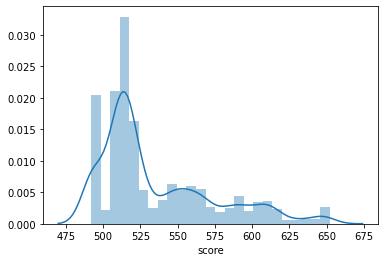

In [178]:
sns.distplot(test['score'])
plt.show()

In [176]:
test['image_30_roi'] = test['create_role_30_pay_sum'] / test['image_run_date_amount']
test['label'] = test['image_30_roi'].apply(lambda x:1 if x>=0.4 else(0 if x<0.25 else 2))

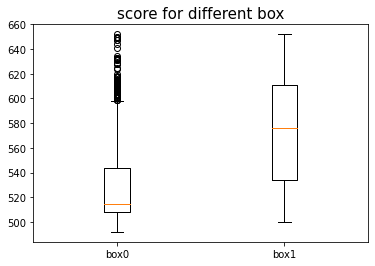

In [177]:
box0 = test[test['label']==0]['score']
box1 = test[test['label']==1]['score']
plt.title('score for different box',fontsize=15)
labels = 'box0','box1'
plt.boxplot([box0,box1],labels=labels)
plt.show()

In [162]:
test[test['score']>=600]['create_role_30_pay_sum'].sum() / test[test['score']>=600]['image_run_date_amount'].sum()

0.5668789181159495

In [163]:
test[test['score']<600]['create_role_30_pay_sum'].sum() / test[test['score']<600]['image_run_date_amount'].sum()

0.29911660883181423

In [164]:
print('高分区ROI：',test[test['score']>=560]['create_role_30_pay_sum'].sum() / test[test['score']>=560]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<560]['create_role_30_pay_sum'].sum() / test[test['score']<560]['image_run_date_amount'].sum())

高分区ROI： 0.4833577767773328
低分区ROI： 0.23351694598978998


In [181]:
print('高分区ROI：',test[test['score']>=580]['create_role_30_pay_sum'].sum() / test[test['score']>=580]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<580]['create_role_30_pay_sum'].sum() / test[test['score']<580]['image_run_date_amount'].sum())

高分区ROI： 0.5317409056604818
低分区ROI： 0.26997777878816565


In [165]:
print('高分区ROI：',test[test['score']>=540]['create_role_30_pay_sum'].sum() / test[test['score']>=540]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<540]['create_role_30_pay_sum'].sum() / test[test['score']<540]['image_run_date_amount'].sum())

高分区ROI： 0.437595647757276
低分区ROI： 0.1652703378014701


In [168]:
print('全test样本的ROI为：',test['create_role_30_pay_sum'].sum() / test['image_run_date_amount'].sum())

全test样本的ROI为： 0.37838112139818614


In [179]:
print('高分区消耗金额占比',test[test['score']>=600]['image_run_date_amount'].sum() / test['image_run_date_amount'].sum())

高分区消耗金额占比 0.2960256534173397


In [182]:
print('高分区消耗金额占比',test[test['score']>=580]['image_run_date_amount'].sum() / test['image_run_date_amount'].sum())

高分区消耗金额占比 0.41412762716155177


In [173]:
print('高分区消耗金额占比',test[test['score']>=560]['image_run_date_amount'].sum() / test['image_run_date_amount'].sum())

高分区消耗金额占比 0.5798258633377038


In [166]:
test.head()

,image_id,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win,score
0,16276,5710.84,0,196,0,7,0.0,29.136939,0.0,0,0.0,0.0,0.0,0.0,0.1005,0,2020-10-02,3,523
1,16316,1023.57,0,7,0,2,0.0,146.224286,0.0,0,0.0,0.0,0.0,0.0,0.1000,0,2020-10-02,3,508
2,18216,3303.96,0,58,0,2,0.0,56.964828,0.0,0,0.0,0.0,0.0,0.0,0.0455,0,2020-10-02,3,505
3,19100,3739.89,0,66,0,1,0.0,56.665000,0.0,0,0.0,0.0,0.0,0.0,0.0735,0,2020-10-02,3,519
4,19208,4388.16,0,69,0,2,0.0,63.596522,0.0,0,0.0,0.0,0.0,0.0,0.0145,12,2020-10-02,3,505


In [172]:
test.to_csv('./test_result_short.csv', index=0)